### OBJECTIVE AND APPROACH

* The goal was to determine which advertising channel—TV, radio, or newspaper—provides the highest return on investment (ROI) or has the greatest impact on the desired outcome.
* Using a predictive model, you varied the investment amounts in each channel to see how changes in investment levels influenced the outcome.

In [1]:
#IMPORT 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Exploratory data analysis

<Axes: xlabel='TV', ylabel='Count'>

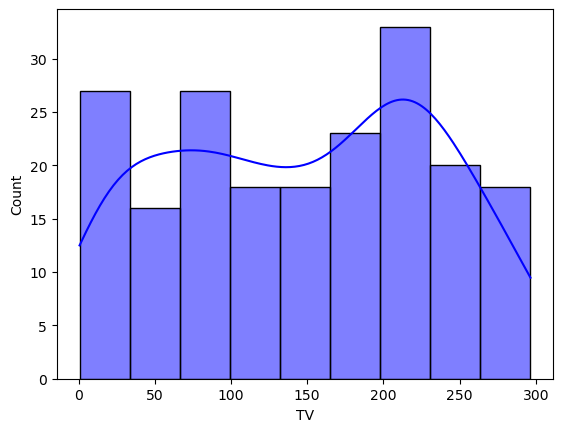

In [9]:
sns.histplot(x='TV',data=data,kde=True,color='b')

<Axes: xlabel='Radio', ylabel='Count'>

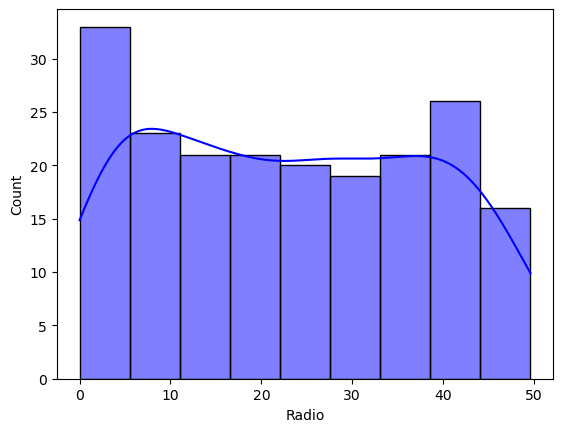

In [10]:
sns.histplot(x='Radio',data=data,kde=True,color='b')

<Axes: xlabel='Newspaper', ylabel='Count'>

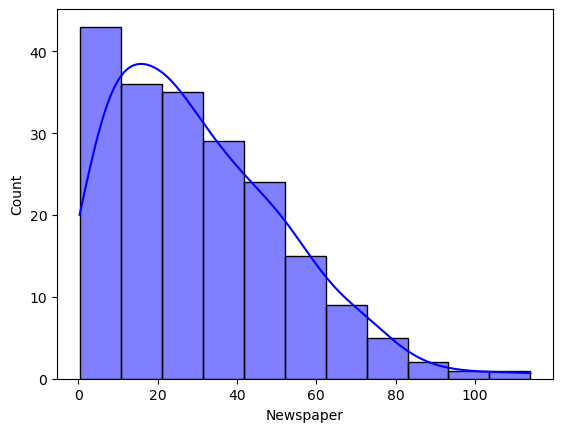

In [11]:
sns.histplot(x='Newspaper',data=data,kde=True,color='b')

<Axes: xlabel='Sales', ylabel='Count'>

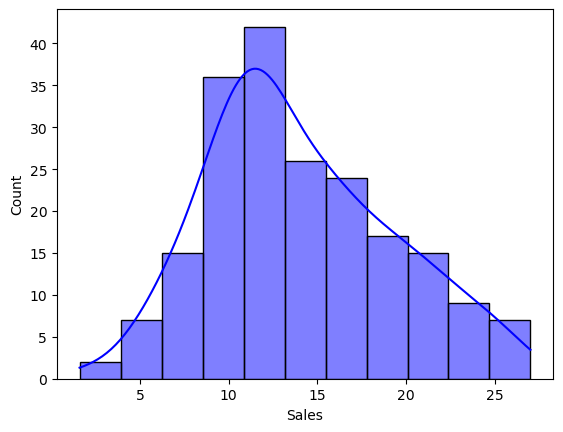

In [12]:
sns.histplot(x='Sales',data=data,kde=True,color='b')

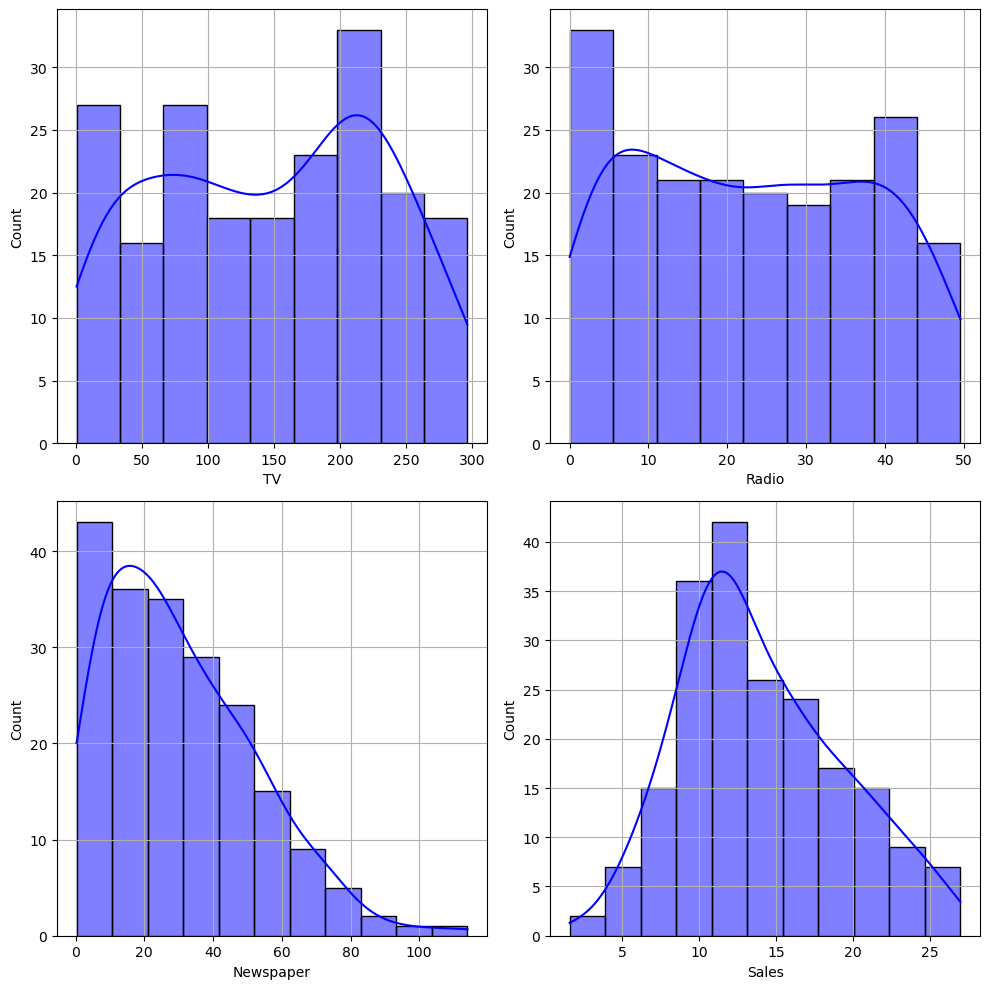

In [13]:
plt.figure(figsize=(10,10))
window=1
for i in data:
    plt.subplot(2,2,window)
    sns.histplot(x=i,data=data,kde=True,color='b')
    plt.grid()
    window += 1
plt.tight_layout()#to avoide overlay

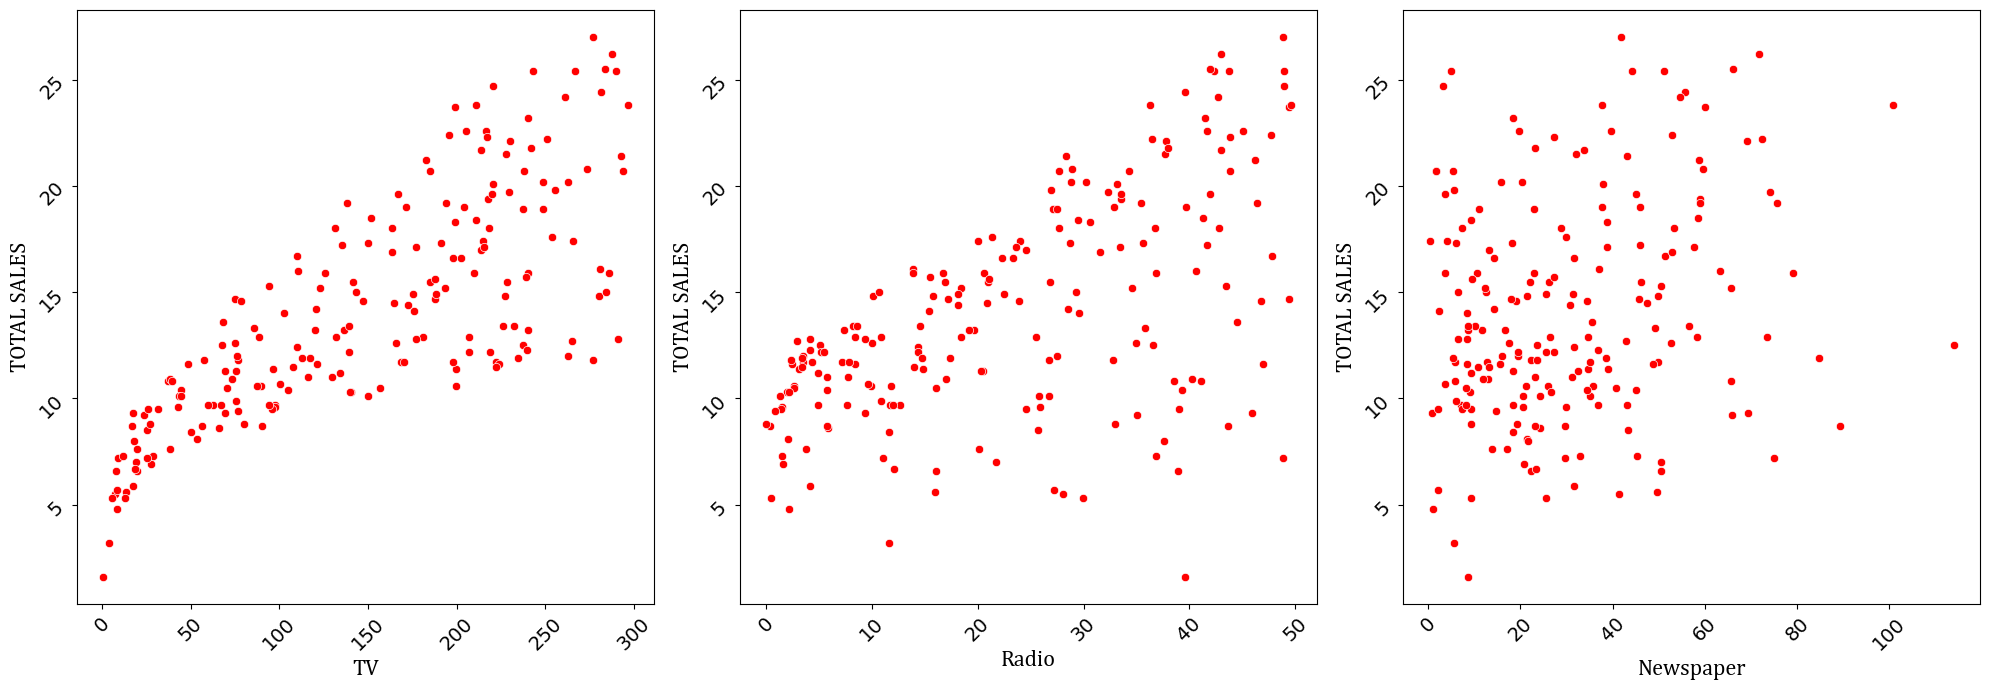

In [14]:
plt.figure(figsize=(20,7))
window=1
for i in data.drop('Sales',axis=1):
    plt.subplot(1,3,window)
    sns.scatterplot(x=i,y='Sales',data=data,color='r')
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14,rotation=45)
    plt.xlabel(i,fontsize=16,fontfamily='cambria')
    plt.ylabel('TOTAL SALES',fontsize=16,fontfamily='cambria')
    window += 1
plt.tight_layout()

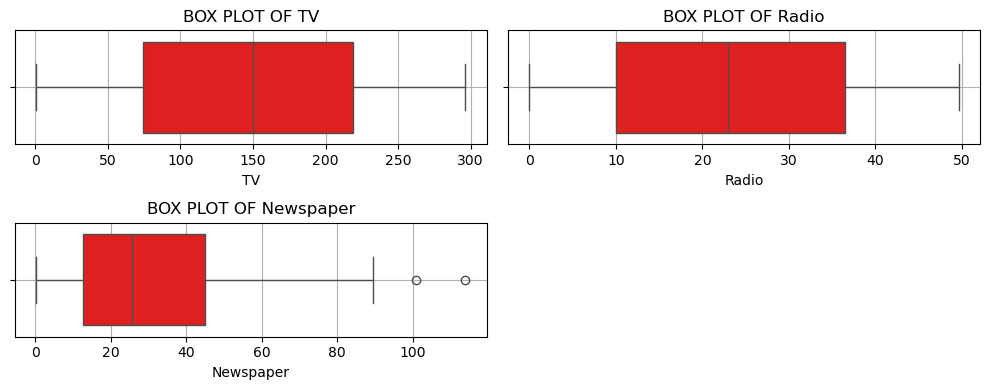

In [15]:
plt.figure(figsize=(10,4))
window=1
for i in data.drop('Sales',axis=1):
    plt.subplot(2,2,window)
    sns.boxplot(x=i,data=data,color='r')
    plt.grid()
    plt.title('BOX PLOT OF {}'.format(i))
    window += 1
plt.tight_layout()

### Hadel outlier with median

In [17]:
data.loc[data.Newspaper >=100,'Newspaper']

16     114.0
101    100.9
Name: Newspaper, dtype: float64

In [18]:
data.loc[data.Newspaper >=100,'Newspaper']=data.Newspaper.median()

In [19]:
data.Newspaper.median()

25.675

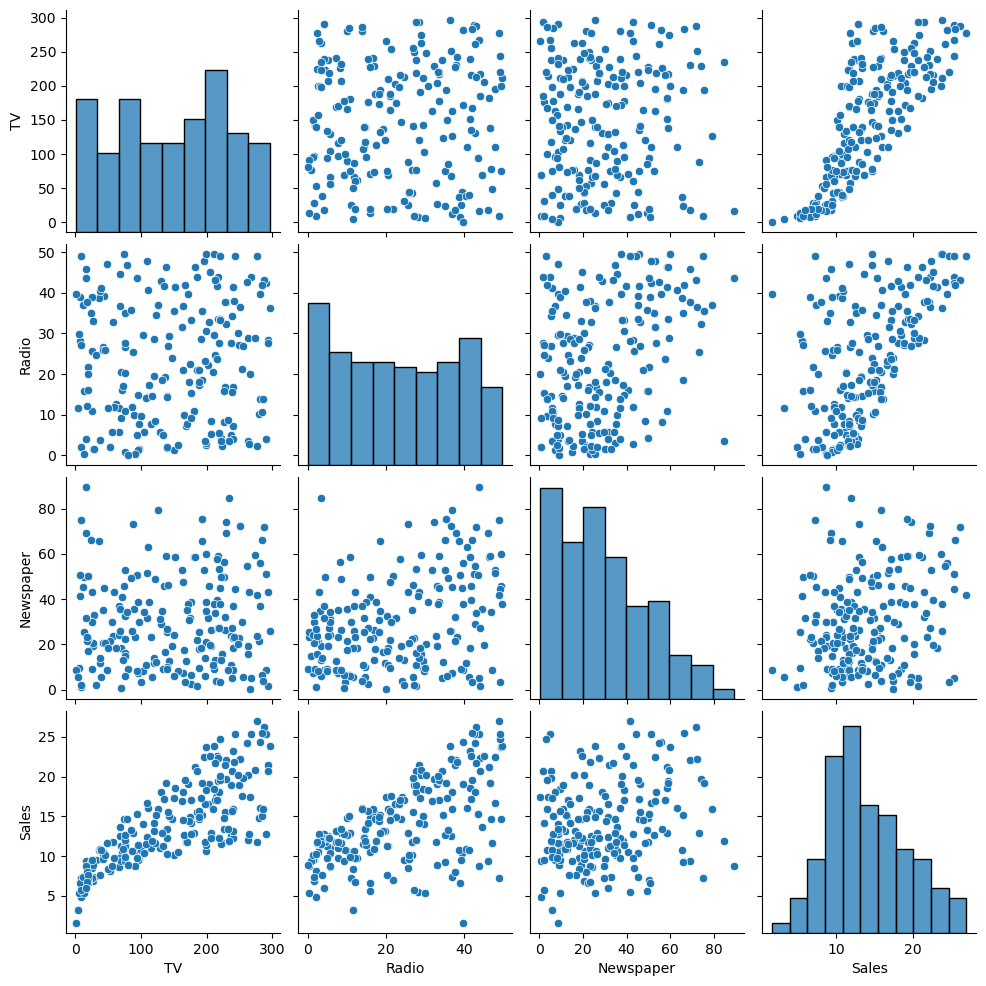

In [20]:
sns.pairplot(data)

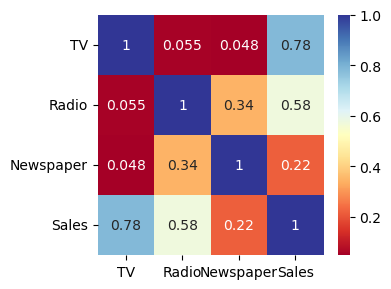

In [21]:
cor= data.corr()
plt.figure(figsize=(4,3))
sns.heatmap(cor,annot=True,cmap='RdYlBu')
plt.tight_layout()

In [22]:
cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


* <=0.05 -btw independent and dependent variable remove that feature 

### Scale the data

In [23]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [24]:
np.max(data.TV)

296.4

In [25]:
import sklearn
sklearn.__version__

'1.2.2'

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
sc= MinMaxScaler()

In [28]:
sc.fit_transform(data.drop('Sales',axis=1))

array([[0.77578627, 0.76209677, 0.77328844],
       [0.1481231 , 0.79233871, 0.50280584],
       [0.0557998 , 0.92540323, 0.77441077],
       [0.50997633, 0.83266129, 0.65319865],
       [0.60906324, 0.21774194, 0.65207632],
       [0.02705445, 0.9858871 , 0.83838384],
       [0.19208657, 0.66129032, 0.26038159],
       [0.4041258 , 0.39516129, 0.12682379],
       [0.02671627, 0.04233871, 0.00785634],
       [0.67331755, 0.05241935, 0.2345679 ],
       [0.2211701 , 0.11693548, 0.26823793],
       [0.72370646, 0.48387097, 0.04152637],
       [0.07811972, 0.70766129, 0.7362514 ],
       [0.32735881, 0.15322581, 0.07744108],
       [0.68785932, 0.66330645, 0.51290685],
       [0.65843761, 0.96169355, 0.59034792],
       [0.22691917, 0.73790323, 0.28563412],
       [0.94927291, 0.7983871 , 0.62289562],
       [0.2316537 , 0.41330645, 0.2020202 ],
       [0.49577274, 0.48185484, 0.21099888],
       [0.73621914, 0.55846774, 0.5959596 ],
       [0.80047345, 0.10282258, 0.26038159],
       [0.

In [29]:
#to assign the preprossed data
X= pd.DataFrame(sc.fit_transform(data.drop('Sales',axis=1)),columns= data.drop('Sales',axis=1).columns)

In [30]:
X

,TV,Radio,Newspaper
0,0.775786,0.762097,0.773288
1,0.148123,0.792339,0.502806
2,0.055800,0.925403,0.774411
3,0.509976,0.832661,0.653199
4,0.609063,0.217742,0.652076
...,...,...,...
195,0.126818,0.074597,0.151515
196,0.316199,0.098790,0.087542
197,0.596212,0.187500,0.068462
198,0.956713,0.846774,0.739618


In [31]:
y=data.Sales

In [32]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [33]:
X.shape

(200, 3)

In [34]:
y.shape

(200,)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=16)

In [37]:
X_train.head()

,TV,Radio,Newspaper
45,0.589787,0.453629,0.350168
195,0.126818,0.074597,0.151515
178,0.933378,0.046371,0.262626
104,0.803179,0.691532,0.056117
190,0.131214,0.828629,0.061728


### Model creation

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
LinearReg_model=  LinearRegression()

In [40]:
LinearReg_model

LinearRegression()

In [41]:
LinearReg_model.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred=LinearReg_model.predict(X_test)

In [43]:
y_pred

array([15.49918749, 20.38320831, 13.76363435, 18.10415226, 13.90553228,
        7.45166947,  9.92522697, 12.14570399,  9.15124276,  7.68420742,
       10.05295686, 12.67418798, 20.31810975, 11.77037555,  8.53027503,
       14.62519038, 10.38293038, 17.04335544,  9.40364583, 13.84068588,
        9.70973812, 14.31059543, 16.39273842, 15.45137576, 21.64257093,
       20.5608969 , 10.63930837, 20.36109251, 13.99375933, 17.82489397,
       19.31900557, 14.1585188 , 10.6365843 , 16.8590819 , 18.14558139,
        6.11153628, 12.56862088, 19.16772073,  5.39929046, 15.30814613])

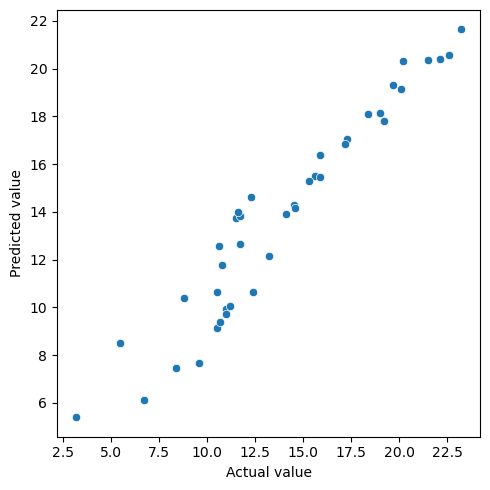

In [44]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.tight_layout()


In [45]:
y_test.shape

(40,)

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [47]:
mse= mean_squared_error(y_test,y_pred)

In [48]:
mse

1.8848974252770805

In [49]:
rmse=mean_squared_error(y_test,y_pred)**0.5
rmse

1.3729156657555774

In [50]:
mae= mean_absolute_error(y_test,y_pred)
mae

1.1324492808118485

In [51]:
r2= r2_score(y_test,y_pred)
r2

0.9184783854478343

In [52]:
adjusted_r2= 1-((1-r2)*(40-1)/(40-3-1))
adjusted_r2

0.9116849175684871

In [53]:
d= pd .DataFrame([[mse,mae,rmse,r2,adjusted_r2]], columns=['mse','mae','rmse','r2','adjusted_r2'])

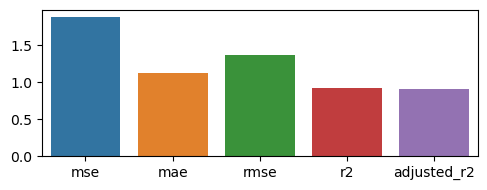

In [54]:
plt.figure(figsize=(5,2))
sns.barplot(d)
plt.tight_layout()

### get best random_state value

In [55]:
dummy=LinearRegression()
rs=[]
dummy_r2=[]
for i in range (43):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    dummy.fit(X_train,y_train)
    pred=dummy.predict(X_test)
    dummy_r2.append(r2_score(y_test,pred))
    rs.append(i)

In [56]:
rs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42]

In [57]:
dummy_r2

[0.8596765228683659,
 0.8932046345002822,
 0.7562192813171079,
 0.9134960505313,
 0.9086633358695456,
 0.8983138844673859,
 0.9224495735003383,
 0.909584559007264,
 0.8457067089049837,
 0.9258203879595663,
 0.835425731252814,
 0.8430155560473617,
 0.9127810833409604,
 0.9310544768869486,
 0.8548216597098913,
 0.9064189346897505,
 0.9184783854478343,
 0.8262381675478694,
 0.8682978678986948,
 0.9027923202994259,
 0.9030961227400773,
 0.9221552022112224,
 0.918178280222255,
 0.9101436652009766,
 0.9046924269536288,
 0.8743263616761661,
 0.8753649280776287,
 0.9054600982972413,
 0.8838813298154152,
 0.9115611685886668,
 0.907390279919716,
 0.9285421462761231,
 0.777345361167704,
 0.8934594912544963,
 0.8925108033489719,
 0.7853385847524821,
 0.9268393518854328,
 0.8840373795128909,
 0.8925603972003888,
 0.8778374448707043,
 0.7984498316546166,
 0.8818031825813212,
 0.8999440917857242]

In [58]:
#get the index position of best r2 score
np.max(dummy_r2)

0.9310544768869486

In [59]:
np.argmax(dummy_r2)

13

In [60]:
rs[np.argmax(dummy_r2)]# best random_state

13

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)
BestLinearReg_model=  LinearRegression()
BestLinearReg_model.fit(X_train,y_train)
y_pred=BestLinearReg_model.predict(X_test)

In [62]:
best_r2=r2_score(y_test,y_pred)
best_r2

0.9310544768869486

In [63]:
adj_r2= 1-((1-best_r2)*(40-1)/(40-3-1))
adj_r2

0.9253090166275277

In [64]:
df=pd.DataFrame([[r2,best_r2],[adjusted_r2,adj_r2]],columns=['Befor','After'])
df

,Befor,After
0,0.918478,0.931054
1,0.911685,0.925309


In [65]:
print(r2)
print(adjusted_r2)
print(best_r2)
print(adj_r2)

0.9184783854478343
0.9116849175684871
0.9310544768869486
0.9253090166275277


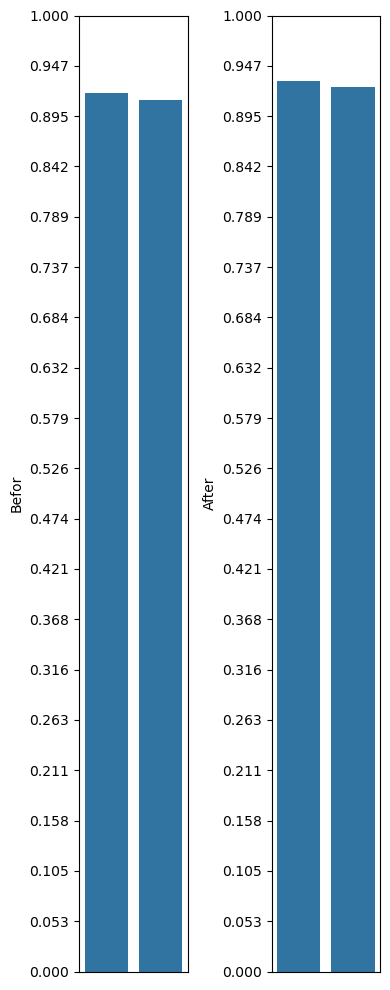

In [66]:
plt.figure(figsize=(4,10))
wind=1
for i in df:
    plt.subplot(1,2,wind)
    sns.barplot(df[i])
    plt.xticks([])
    plt.yticks(np.linspace(0,1,20))
    wind+=1
plt.tight_layout()
plt.show()

In [67]:
# !pip install seaborn --upgrade

### Conclusion

In [68]:
import pickle# package -(pickle) open/close/read/write

In [69]:
file=open('myfirstmodel.pkl','wb')
pickle.dump(BestLinearReg_model,file)
file.close()

In [70]:
with open('myfirstmodel.pkl','wb') as file:
     pickle.dump(BestLinearReg_model,file)
